# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
#!pip install -U scikit-learn
#!pip install --upgrade -q threadpoolctl

## Loading the dataset

In [ ]:
#from google.colab import drive
#drive.mount("/gdrive")
#%cd /gdrive/My Drive/Credit_Card_Users_Churn_Prediction


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Credit_Card_Users_Churn_Prediction


In [ ]:

url = 'https://raw.githubusercontent.com/vijay-aacintya/dsp_data/refs/heads/main/BankChurners.csv'
creditData = pd.read_csv(url)


## Data Overview

In [ ]:
# View Top 10 records in the dataset
creditData.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
#View bottom 10 records in the dataset
creditData.tail(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106
10118,713755458,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,abc,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [ ]:
# View the shape of the data set.
# How Many features and Observations
creditData.shape

(10127, 21)

Observation:
* There are 21 features and 10127 observations

**Statistical Summary of the dataset**

In [ ]:
# Statistical analysis of the Numeric or continious data
creditData.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


- Observations
  *   Client Number should not be a numeric value.
  *   Avg age of the customers is 46
  *   75% of the customers have more than or equal to 2 dependents.




In [ ]:
creditData.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Checking for Missing values**

In [ ]:
# checking for null values
creditData.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

**Observation:** There are missing values for Education Level and Marital Status. There are significant amount of values are missing in this dataset.

**Checking for Duplicate Values**

In [ ]:
# checking for duplicate values
creditData.duplicated().sum()

0

* There are no duplicate values in the data.

**Determining the unique values in each columns/features in the data set**

In [ ]:
for column in creditData.columns:
    unique_values = creditData[column].nunique()
    print(f"Feature '{column}' has {unique_values} unique value(s).")

Feature 'CLIENTNUM' has 10127 unique value(s).
Feature 'Attrition_Flag' has 2 unique value(s).
Feature 'Customer_Age' has 45 unique value(s).
Feature 'Gender' has 2 unique value(s).
Feature 'Dependent_count' has 6 unique value(s).
Feature 'Education_Level' has 6 unique value(s).
Feature 'Marital_Status' has 3 unique value(s).
Feature 'Income_Category' has 6 unique value(s).
Feature 'Card_Category' has 4 unique value(s).
Feature 'Months_on_book' has 44 unique value(s).
Feature 'Total_Relationship_Count' has 6 unique value(s).
Feature 'Months_Inactive_12_mon' has 7 unique value(s).
Feature 'Contacts_Count_12_mon' has 7 unique value(s).
Feature 'Credit_Limit' has 6205 unique value(s).
Feature 'Total_Revolving_Bal' has 1974 unique value(s).
Feature 'Avg_Open_To_Buy' has 6813 unique value(s).
Feature 'Total_Amt_Chng_Q4_Q1' has 1158 unique value(s).
Feature 'Total_Trans_Amt' has 5033 unique value(s).
Feature 'Total_Trans_Ct' has 126 unique value(s).
Feature 'Total_Ct_Chng_Q4_Q1' has 830 uniq

In [ ]:
# Dropping the Feature CLIENTNUM because every observation is unique
creditData = creditData.drop(["CLIENTNUM"], axis=1)
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Exploratory Data Analysis (EDA)

### EDA Functions

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="lightgreen"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow",hue=target)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",hue=None
    )

    plt.tight_layout()
    plt.show()

### Exploratory Data Analysis

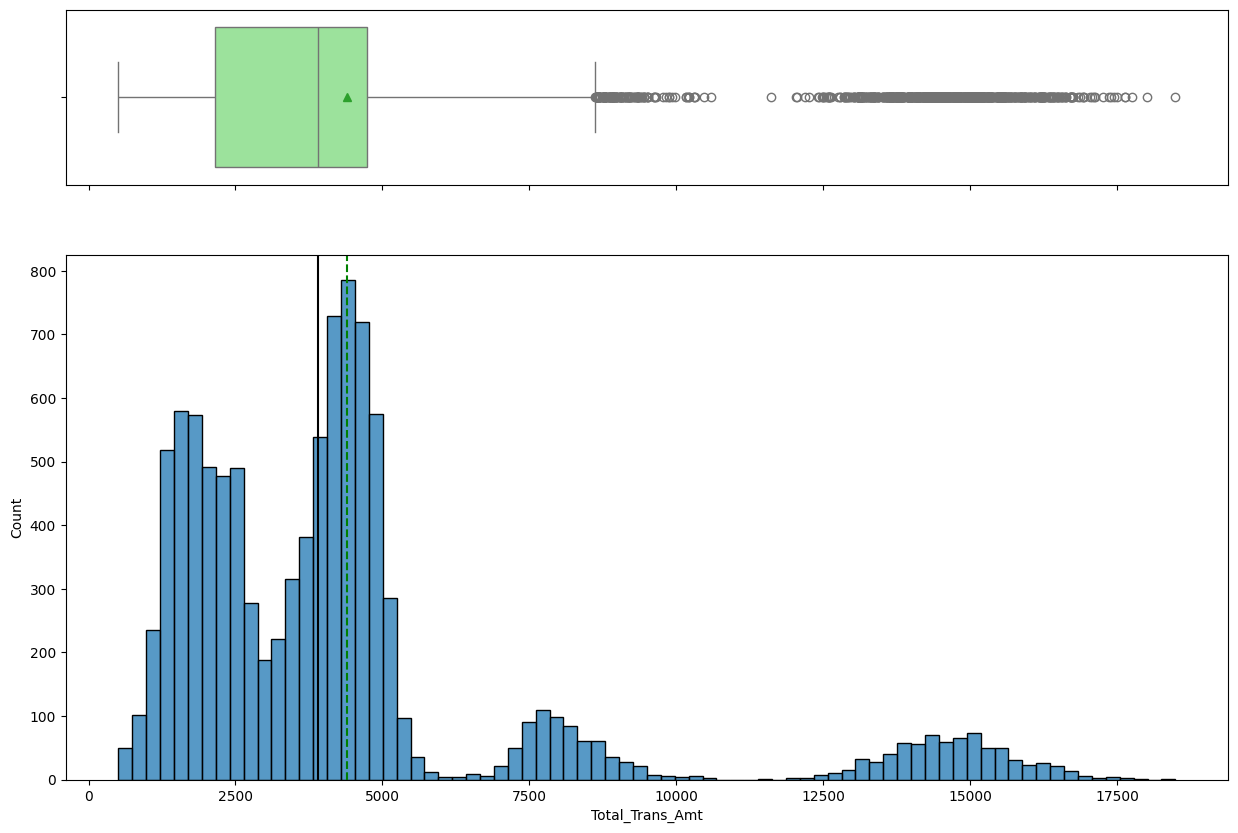

In [ ]:
#How is the total transaction amount distributed?
histogram_boxplot(creditData, "Total_Trans_Amt")

**Observations**

* The Total Transaction is right skewed.
* There are several outliers present.

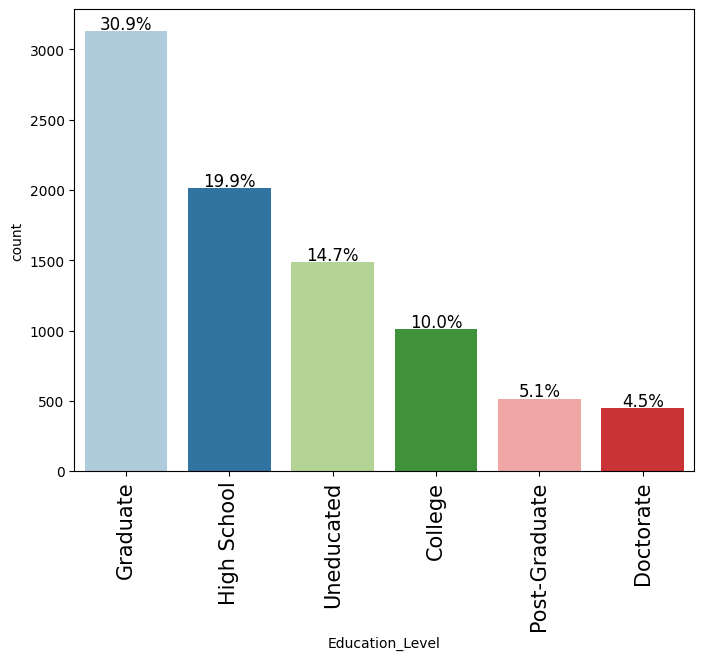

In [ ]:
# What is the distribution of the level of education of customers?
labeled_barplot(creditData, "Education_Level", perc=True)


**Observation**
* Most of the customers are Graduates.
* Least of the observations have Doctorate followed by Post-Graduate.

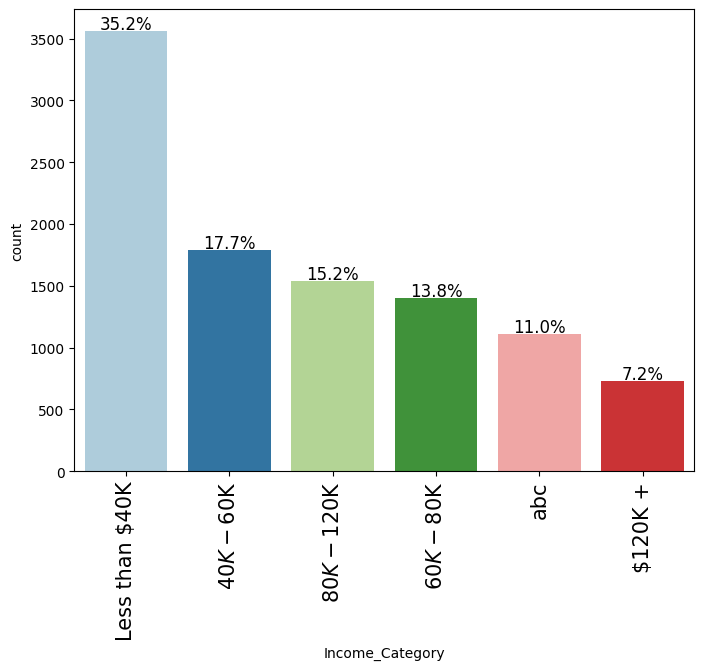

In [ ]:
#What is the distribution of the level of income of customers?
labeled_barplot(creditData, "Income_Category", perc=True)

**Observation**

* Most of the customers earn less than 40K per Year.
* 13.8% of the customers earn between 60K - 80K

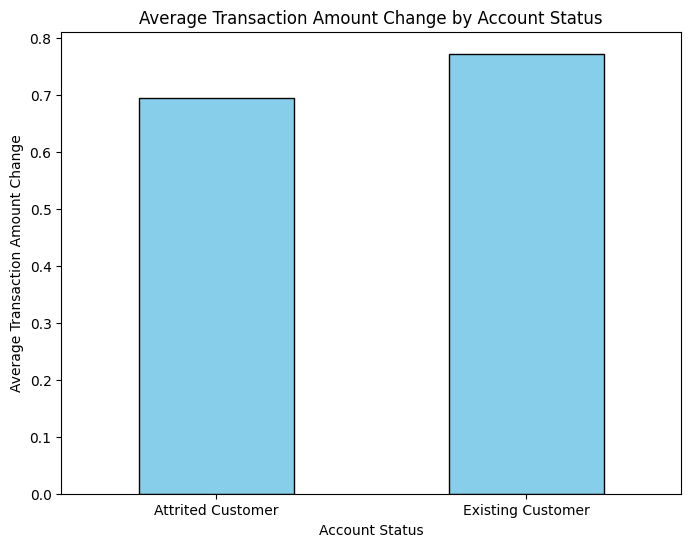

In [ ]:
# How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?
grouped_data = creditData.groupby('Attrition_Flag')['Total_Amt_Chng_Q4_Q1'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Transaction Amount Change by Account Status")
plt.xlabel("Account Status")
plt.ylabel("Average Transaction Amount Change")
plt.xticks(rotation=0)
plt.show()

**Observation:**
* The average transaction amount change is more for the Existing customers.



In [ ]:
creditData.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



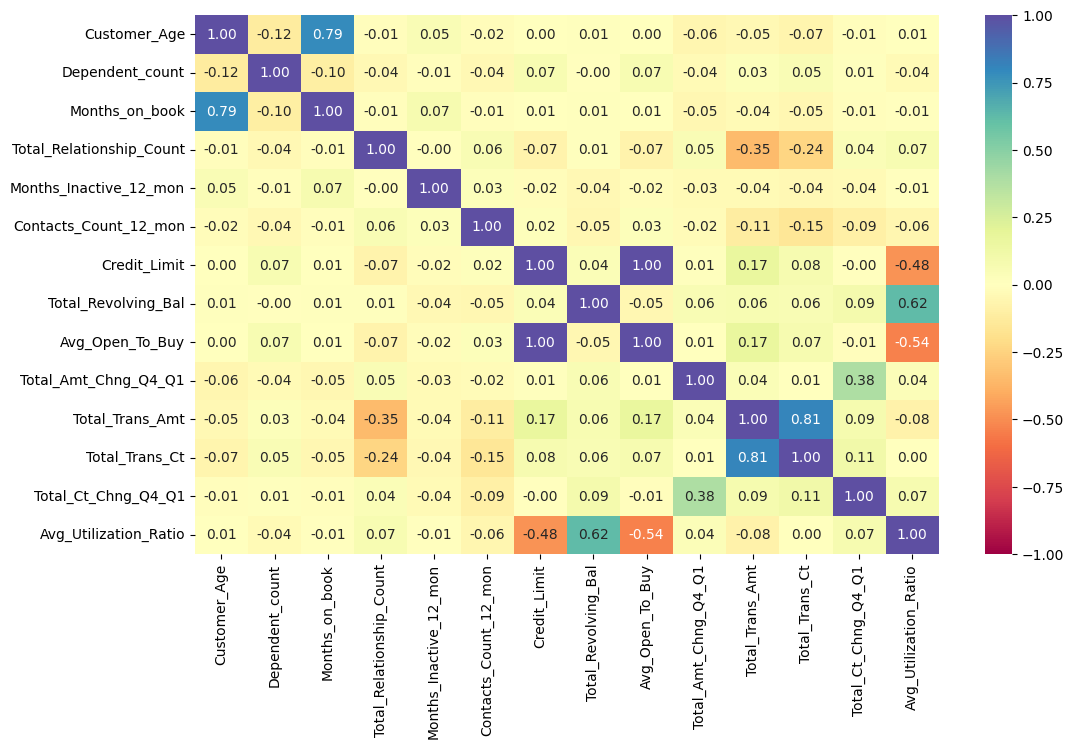

In [ ]:
# What are the attributes that have a strong correlation with each other?
cols_list = creditData.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    creditData[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation**
There is a strong positive correlation between Months_on_Book and Customer_Age
There is a strong positive correlation between Total_Trans_Amt and Total_Trans_Ct

There is positive correlation between Total_Revolving_Bal and Avg_Utilization_Ratio

There is a negative correlation between Total_Revolving_Bal and Avg_Utilization_Ratio

THere is a negative correlation between Credit_Limit and Avg_Utilization_Ratio.

### Bivariant Analysis

Card_Category   Blue  Gold  Platinum  Silver   All
Marital_Status                                    
All             8753   104        18     503  9378
Single          3624    58        10     251  3943
Married         4433    41         7     206  4687
Divorced         696     5         1      46   748
------------------------------------------------------------------------------------------------------------------------


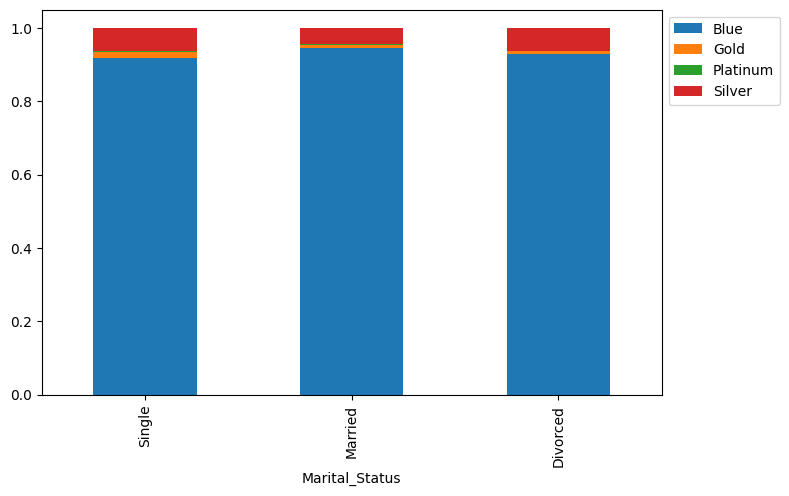

In [ ]:
stacked_barplot(creditData, "Marital_Status", "Card_Category")

**Observation:**
Whether they are single, Married or Divorced most of the customers have Blue Credit Card, followed by Silver.

Card_Category      Blue  Gold  Platinum  Silver    All
Attrition_Flag                                        
All                9436   116        20     555  10127
Existing Customer  7917    95        15     473   8500
Attrited Customer  1519    21         5      82   1627
------------------------------------------------------------------------------------------------------------------------


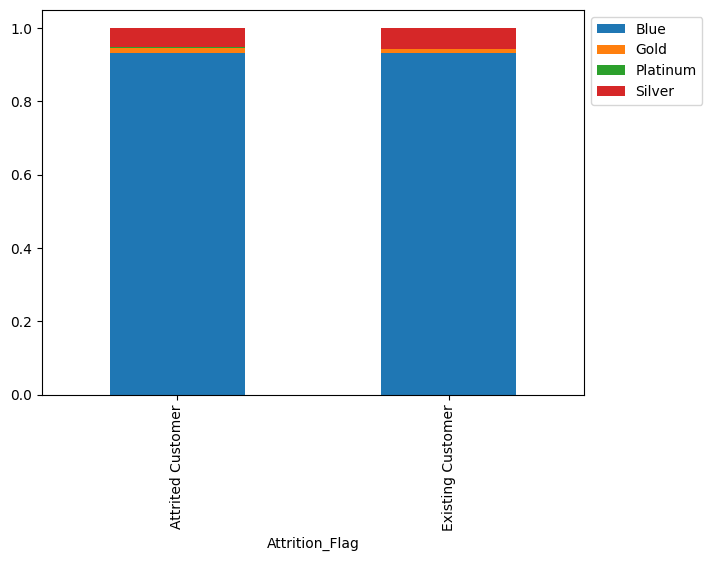

In [ ]:
stacked_barplot(creditData, "Attrition_Flag", "Card_Category")

**Observation**
* The attrition rate is 16% for Blue Credit Cards and 14% for Silver Credit Cards, with higher rates for other categories. To reduce the overall attrition rate, the bank should focus on upgrading customers to the Silver Card category, as this is associated with a lower attrition rate.

Gender                F     M    All
Attrition_Flag                      
All                5358  4769  10127
Existing Customer  4428  4072   8500
Attrited Customer   930   697   1627
------------------------------------------------------------------------------------------------------------------------


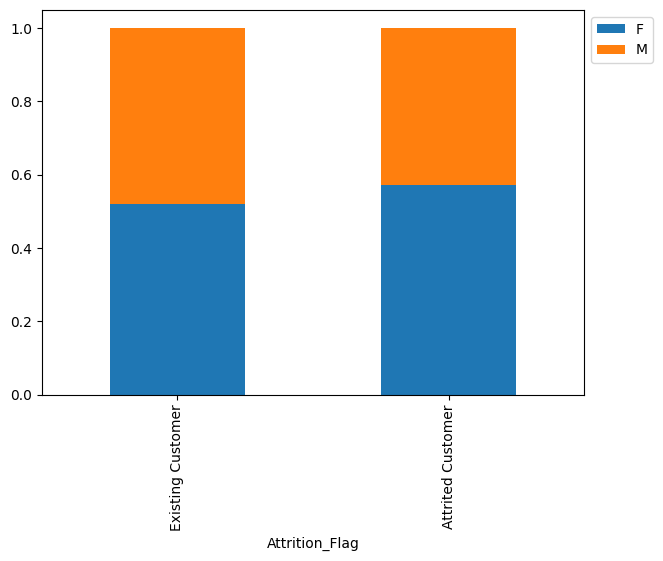

In [ ]:
stacked_barplot(creditData, "Attrition_Flag", "Gender")

**Observation**
* When we compare gender, there is no significant different between them on attrition rate.

## Data Pre-processing

## Missing value imputation




In [ ]:
#Filling Missing values
creditData['Education_Level'].fillna('MISSING', inplace=True)
creditData['Marital_Status'].fillna('MISSING', inplace=True)


In [ ]:
# Replace 'Attrition_Flag' values with 1 if 'X', else 0
creditData['Attrition_Flag'] = creditData['Attrition_Flag'].apply(lambda x: 1 if x == "Existing Customer" else 0)

In [ ]:
# Type Casting the COlumn Name Attrition Flag to integer
creditData['Attrition_Flag'] = creditData['Attrition_Flag'].astype(int)

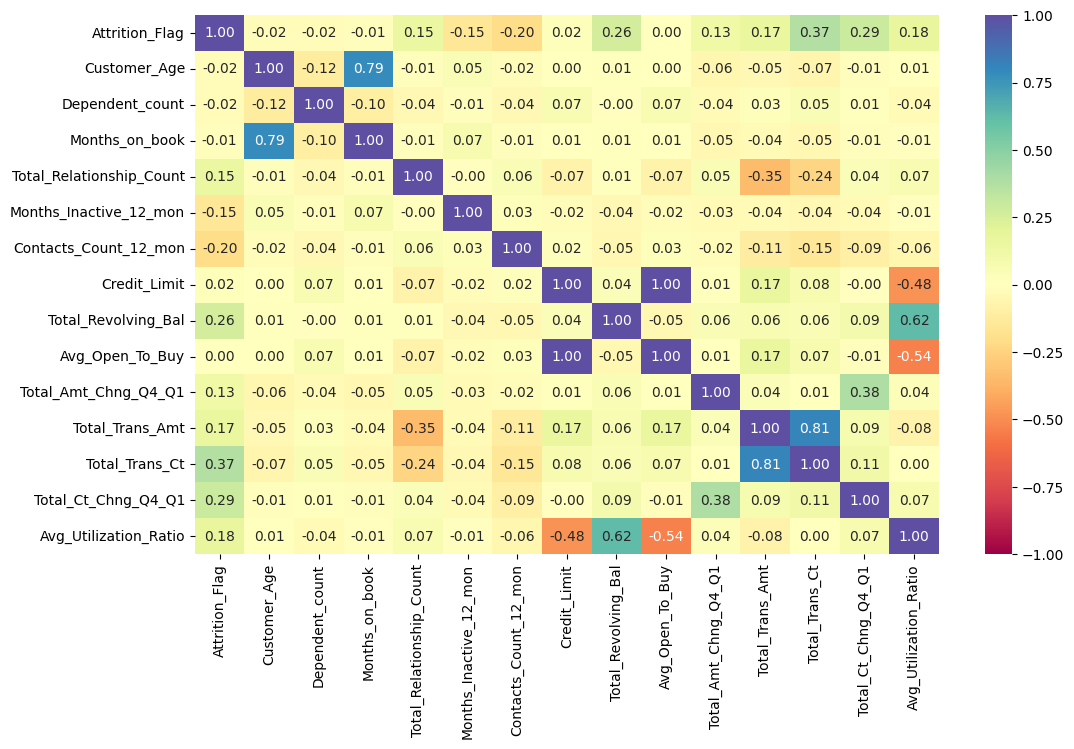

In [ ]:
# What are the attributes that have a strong correlation with each other? We are including Attrition Flag column after converting this in to an integer
cols_list = creditData.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    creditData[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observaton: Attrition Flag is mostly correlated with Total_Ct_Chng_Q4_Q1. Although we do not have a strong correlation with any features.

In [ ]:
# Define the bins and labels for customer age.
bins = [0, 25, 50, 75, float('inf')]
labels = ['0-25', '26-50', '51-75', '76+']

In [ ]:
# Categorize the 'Customer_Age' using cut
creditData['Age_Category'] = pd.cut(creditData['Customer_Age'], bins=bins, labels=labels, right=False)

In [ ]:
# Dropping the Feature Customer_Age as we have categorized
creditData = creditData.drop(["Customer_Age"], axis=1)
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Gender                    10127 non-null  object  
 2   Dependent_count           10127 non-null  int64   
 3   Education_Level           10127 non-null  object  
 4   Marital_Status            10127 non-null  object  
 5   Income_Category           10127 non-null  object  
 6   Card_Category             10127 non-null  object  
 7   Months_on_book            10127 non-null  int64   
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Avg_Open_To_Buy           10127 non-null  floa

In [ ]:
# Lets convert the columns with an 'object' datatype into categorical variables
for feature in creditData.columns: # Loop through all columns in the dataframe
    if creditData[feature].dtype == 'object': # Only apply for columns with categorical strings
        creditData[feature] = pd.Categorical(creditData[feature])# Replace strings with an integer
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Gender                    10127 non-null  category
 2   Dependent_count           10127 non-null  int64   
 3   Education_Level           10127 non-null  category
 4   Marital_Status            10127 non-null  category
 5   Income_Category           10127 non-null  category
 6   Card_Category             10127 non-null  category
 7   Months_on_book            10127 non-null  int64   
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Avg_Open_To_Buy           10127 non-null  floa

In [ ]:
replaceStruct = {
                "Education_Level":     {"MISSING": -1, "Uneducated": 0 ,"High School": 1 ,"College": 2, "Graduate": 3, "Post-Graduate": 4,"Doctorate":5},
                "Income_Category":     {"Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3, "$80K - $120K": 4, "$120K +": 5},
                "Card_Category":       {'Blue': 1, 'Gold':3, 'Silver': 2, 'Platinum': 4}
                 }
oneHotCols=["Education_Level","Income_Category","Card_Category", "Gender",
            "Marital_Status", "Age_Category"]

In [ ]:
creditData=creditData.replace(replaceStruct)
creditData=pd.get_dummies(creditData, columns=oneHotCols)
creditData.head(10)

,Attrition_Flag,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_MISSING,Marital_Status_Married,Marital_Status_Single,Age_Category_0-25,Age_Category_26-50,Age_Category_51-75,Age_Category_76+
0,1,3,39,5,1,3,12691.0,777,11914.0,1.335,...,False,True,False,False,True,False,False,True,False,False
1,1,5,44,6,1,2,8256.0,864,7392.0,1.541,...,True,False,False,False,False,True,False,True,False,False
2,1,3,36,4,1,0,3418.0,0,3418.0,2.594,...,False,True,False,False,True,False,False,False,True,False
3,1,4,34,3,4,1,3313.0,2517,796.0,1.405,...,True,False,False,True,False,False,False,True,False,False
4,1,3,21,5,1,0,4716.0,0,4716.0,2.175,...,False,True,False,False,True,False,False,True,False,False
5,1,2,36,3,1,2,4010.0,1247,2763.0,1.376,...,False,True,False,False,True,False,False,True,False,False
6,1,4,46,6,1,3,34516.0,2264,32252.0,1.975,...,False,True,False,False,True,False,False,False,True,False
7,1,0,27,2,2,2,29081.0,1396,27685.0,2.204,...,False,True,False,True,False,False,False,True,False,False
8,1,3,36,5,2,0,22352.0,2517,19835.0,3.355,...,False,True,False,False,False,True,False,True,False,False
9,1,2,36,6,3,3,11656.0,1677,9979.0,1.524,...,False,True,False,False,False,True,False,True,False,False


## Model Building

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

## Split the data into train and test sets

When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
This is done by setting the stratify parameter to target variable in the train_test_split function.

In [ ]:
X = creditData.drop("Attrition_Flag" , axis=1)
y = creditData.pop("Attrition_Flag")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

### Building the model
* We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
* First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
* We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

### AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.960214446952596
Accuracy on test set :  0.9624876604146101
Recall on training set :  0.9818456883509834
Recall on test set :  0.9831438651509212
Precision on training set :  0.971072319201995
Precision on test set :  0.9724699495928655


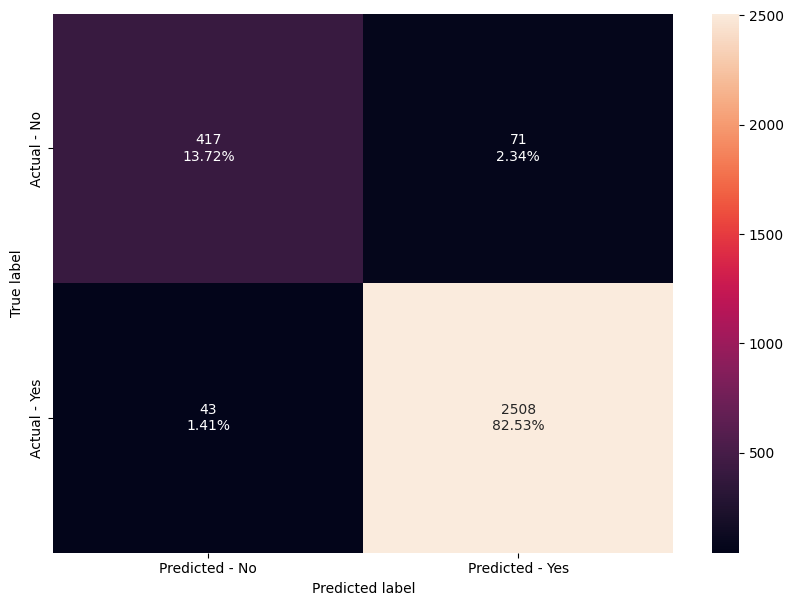

In [ ]:
make_confusion_matrix(abc,y_test)

### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9753103837471784
Accuracy on test set :  0.9624876604146101
Recall on training set :  0.9917633215666498
Recall on test set :  0.9890239121912975
Precision on training set :  0.9790906073680717
Precision on test set :  0.9670371789957838


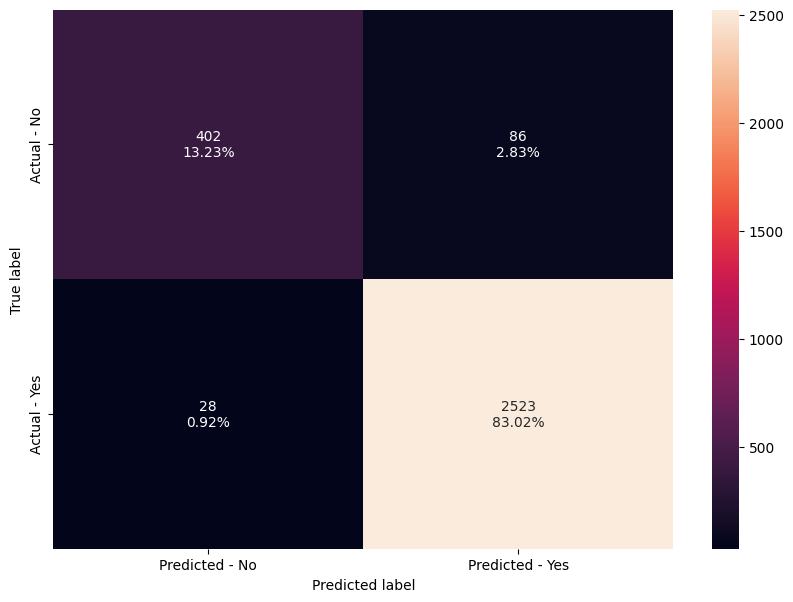

In [ ]:
make_confusion_matrix(gbc,y_test)

### XGBoost Classifier

In [ ]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9700559394537677
Recall on training set :  1.0
Recall on test set :  0.9870638965111721
Precision on training set :  1.0
Precision on test set :  0.9774844720496895


**With default parameters:**
- XGBoost Classifier  has better test accuracy among these 3 models.
- GB classifier and Ada Boost Classifier has the same test accuracy.

## Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

**ADA Boost Classifier with Following Parameters** Model A1
*  "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1)],
    "n_estimators": np.arange(20,100,20),
    "learning_rate":np.arange(0.1,.5,0.1)

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
 #  "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
  "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1)],
    "n_estimators": np.arange(20,100,20),
    "learning_rate":np.arange(0.1,.5,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)




In [ ]:
# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [ ]:
abc_tuned_score1=get_metrics_score(abc_tuned)

Accuracy on training set :  0.8565180586907449
Accuracy on test set :  0.855544587035209
Recall on training set :  0.9998319045217684
Recall on test set :  0.999607996863975
Precision on training set :  0.8541068351522114
Precision on test set :  0.8534136546184738


**ADA Boost Classifier with Following Parameters** Model A2

* "base_estimator":[DecisionTreeClassifier(max_depth=2, random_state=1)], "n_estimators": np.arange(20,100,20), "learning_rate":np.arange(0.1,.5,0.1)

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
 #  "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
  "base_estimator":[DecisionTreeClassifier(max_depth=2, random_state=1)],
    "n_estimators": np.arange(20,100,20),
    "learning_rate":np.arange(0.1,.5,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

In [ ]:
# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=60, random_state=1)

In [ ]:
abc_tuned_score2=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9518905191873589
Accuracy on test set :  0.9483382691674893
Recall on training set :  0.9897461758278703
Recall on test set :  0.9905919247353979
Precision on training set :  0.9546044098573282
Precision on test set :  0.95


**ADA Boost Classifier with Following Parameters** Model A3
*  "base_estimator":[DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(20,100,20),
    "learning_rate":np.arange(0.1,.5,0.1)

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
 #  "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
  "base_estimator":[DecisionTreeClassifier(max_depth=2, random_state=1)],
    "n_estimators": np.arange(20,100,20),
    "learning_rate":np.arange(1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

abc_tuned_score3=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9887133182844243
Accuracy on test set :  0.9624876604146101
Recall on training set :  0.9942847537401244
Recall on test set :  0.9827518620148962
Precision on training set :  0.9922831739640999
Precision on test set :  0.972836631742336


In [ ]:
print(abc_tuned_score1)
print(abc_tuned_score2)
print(abc_tuned_score3)


[0.8565180586907449, 0.855544587035209, 0.9998319045217684, 0.999607996863975, 0.8541068351522114, 0.8534136546184738]
[0.9518905191873589, 0.9483382691674893, 0.9897461758278703, 0.9905919247353979, 0.9546044098573282, 0.95]
[0.9887133182844243, 0.9624876604146101, 0.9942847537401244, 0.9827518620148962, 0.9922831739640999, 0.972836631742336]


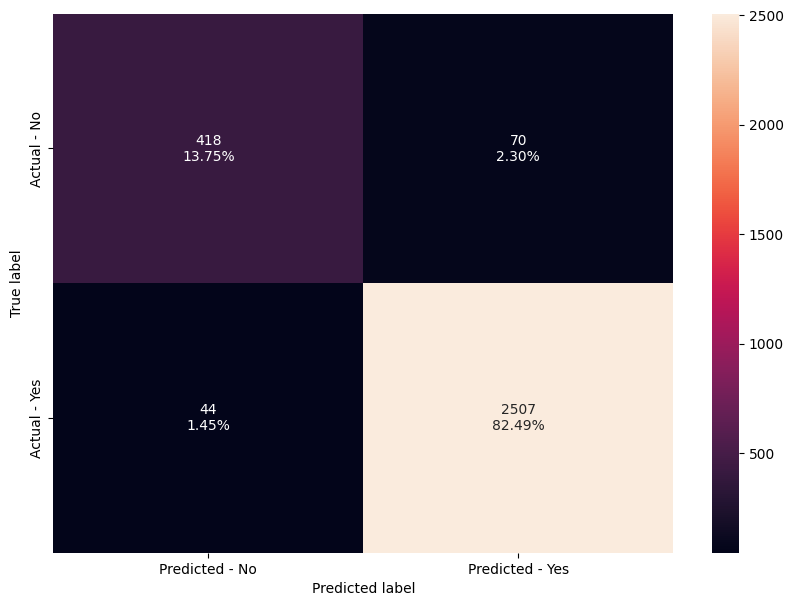

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

**Observation**

* Comparing the model A1, A2 and A3, Model A3 performs better with Accuracy, Recall and Precision.
* The confusion matrix you’ve provided shows the performance of a classification model. Here’s a quick analysis:

True Positives (TP): 2507 (82.49%)
True Negatives (TN): 418 (13.75%)
False Positives (FP): 70 (2.30%)
False Negatives (FN): 44 (1.45%)
The model has a high TP rate, indicating it’s good at identifying the correct positive cases. However, there are still some FP and FN cases to consider.

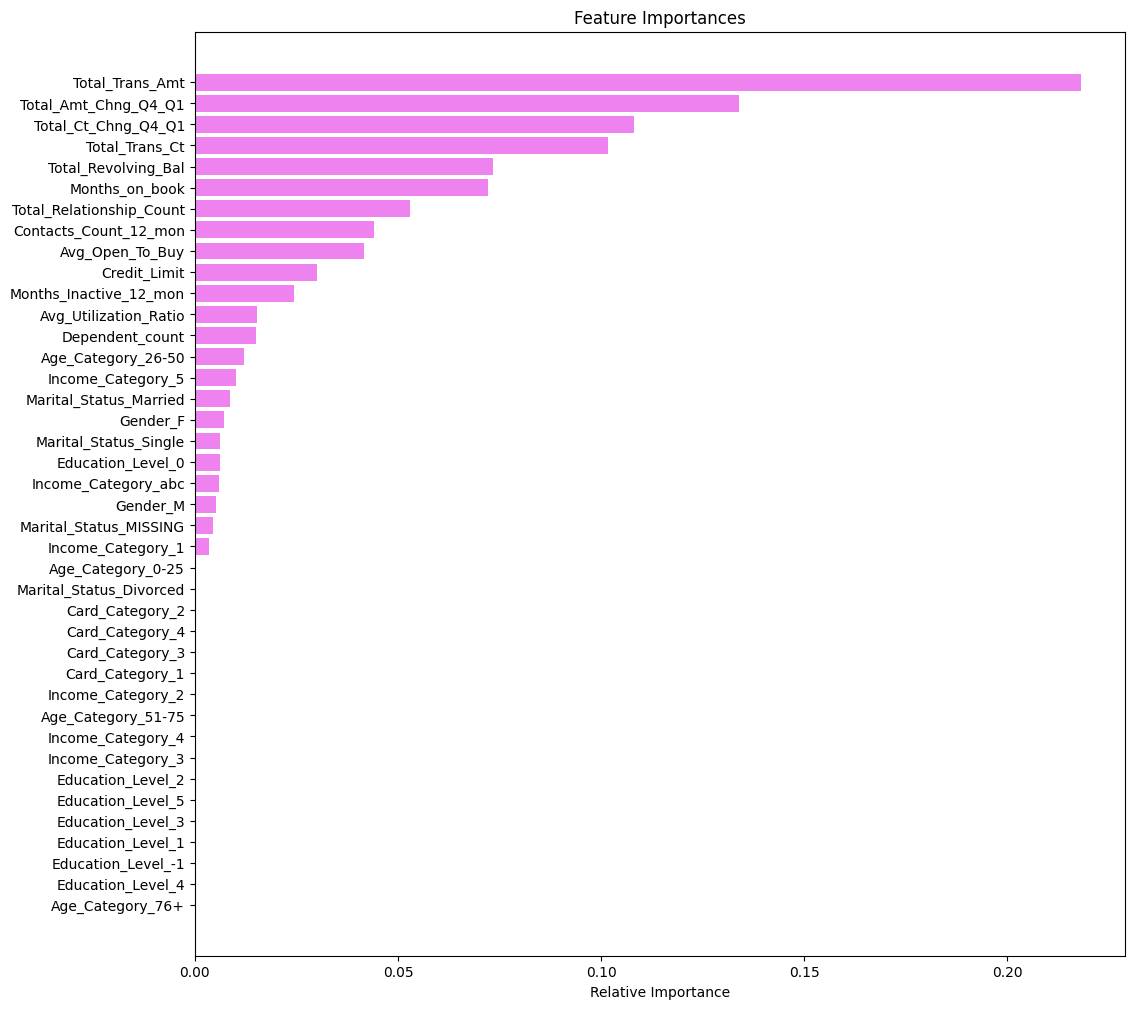

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation:**
Total Transaction Amount is the most important feature as per the tuned AdaBoost model.

### Gradient Boosting Classifier
- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [ ]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.9771444695259593
Accuracy on test set :  0.9638038828562027
Recall on training set :  0.9919314170448815
Recall on test set :  0.9890239121912975
Precision on training set :  0.9810473815461347
Precision on test set :  0.9685220729366603


**Observation:**
* We are getting slightly better accuracy and precision compared to the default parameters.

Let us see whether further tuning helps to get better results.

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
      'n_estimators':np.arange(100,150,10),
    'learning_rate':np.arange(.1,1,.2),
    'max_depth': [4,],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), max_depth=4,
                           random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9867381489841986
Accuracy on test set :  0.9647910496873972
Recall on training set :  0.9947890401748193
Recall on test set :  0.9898079184633477
Precision on training set :  0.9894666443738506
Precision on test set :  0.9689178818112049


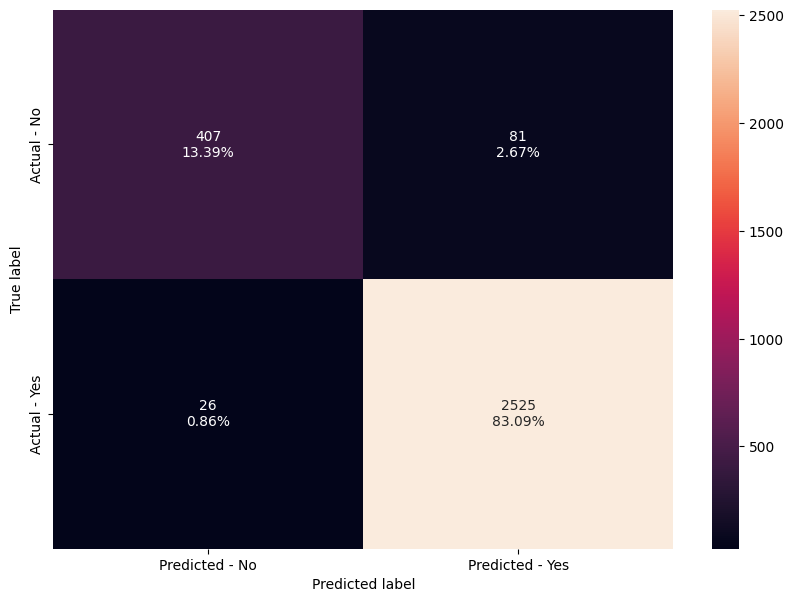

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

**Observation:**

The confusion matrix from this image indicates the following:

True Negatives (TN): 407 (13.93%)
False Positives (FP): 81 (2.67%)
False Negatives (FN): 26 (0.86%)
True Positives (TP): 2525 (83.09%)
This model has a slightly higher TP rate and a lower FN rate compared to the first one, which is good as it means fewer actual positive cases are being missed. The FP rate is slightly higher, indicating a small increase in incorrectly predicted positive cases.

Overall, this model seems to be performing well, especially in identifying true positives. To further improve, I may consider examining the features used for prediction and the balance of the dataset.

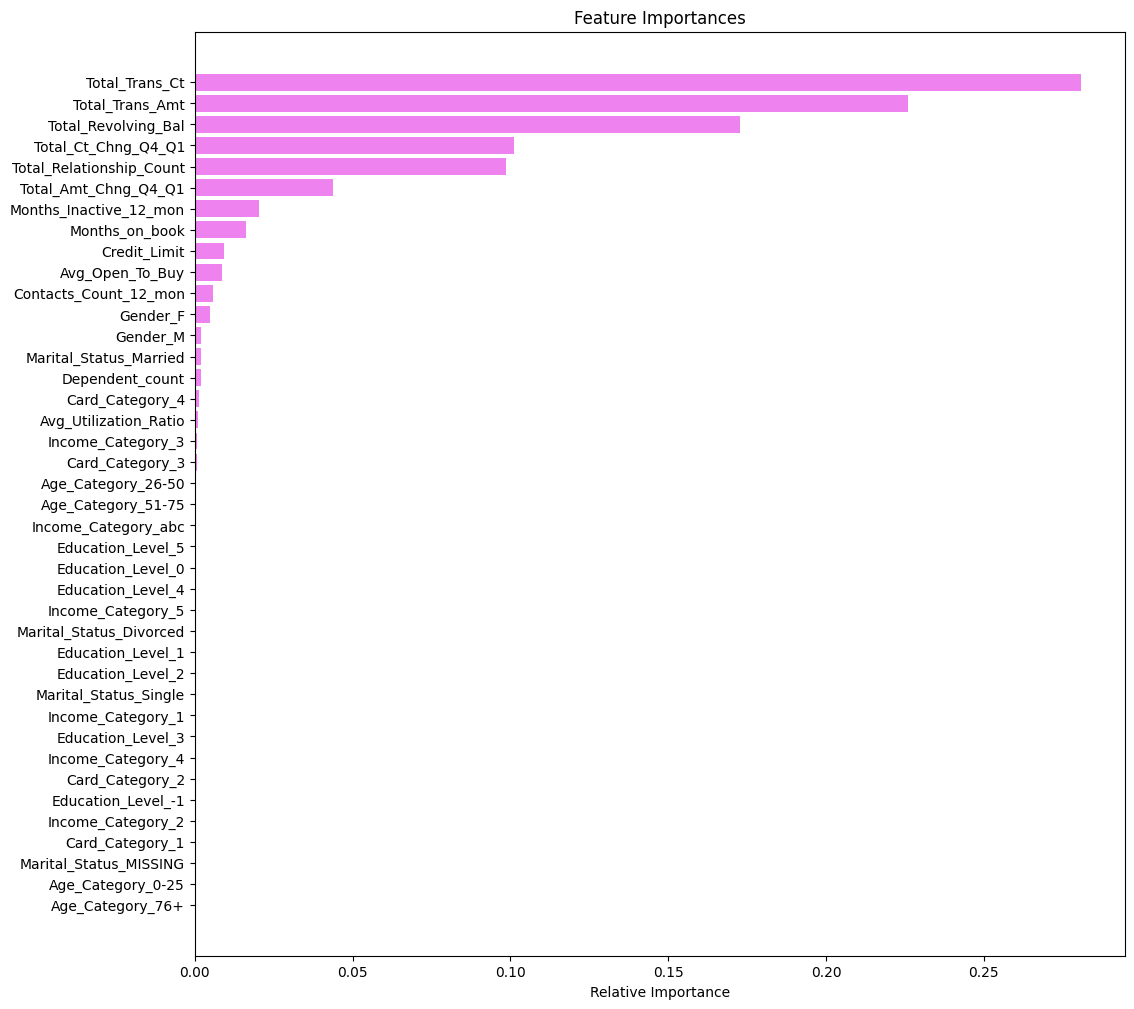

In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation:**
Total Transaction Amount is the most important feature as per the tuned Gradient Boost Classifier model

###XGBoost Classifier

**XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation [here](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters). Some of the important parameters are:**
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(50,100,20),
    "scale_pos_weight":[1],
    "subsample":[0.5],
    "learning_rate":[0.1],
    "gamma":[0,1,],
    "colsample_bytree":[0.7,1],
    "colsample_bylevel":[0.7,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.988854401805869
Accuracy on test set :  0.9667653833497861
Recall on training set :  0.994452849218356
Recall on test set :  0.9882399059192474
Precision on training set :  0.9922844682992285
Precision on test set :  0.972608024691358


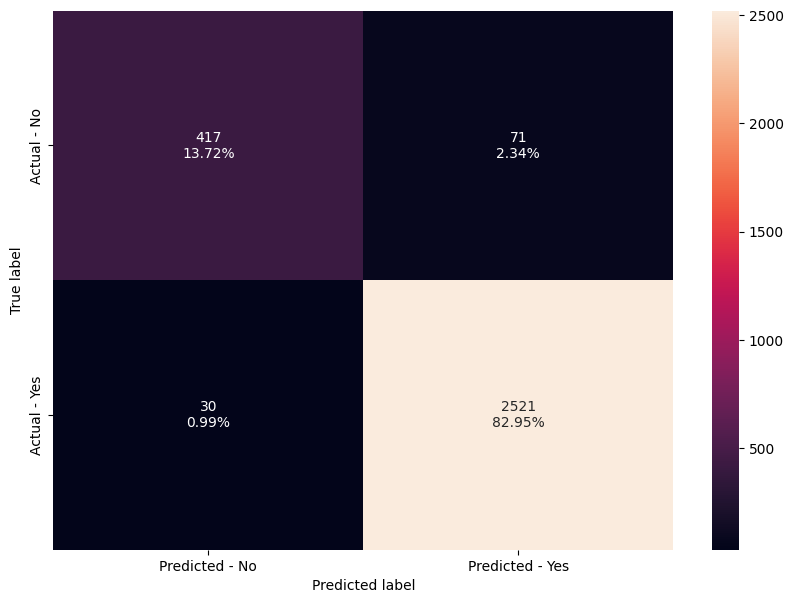

In [ ]:
make_confusion_matrix(xgb_tuned,y_test)

**Observation:**

The confusion matrix provided is a powerful tool for evaluating the performance of a classification model. Here’s a brief analysis:

True Positives (TP): 2521 (82.95%) - The model correctly predicted ‘Yes’ when it was actually ‘Yes’.
True Negatives (TN): 417 (13.72%) - The model correctly predicted ‘No’ when it was actually ‘No’.
False Positives (FP): 71 (2.34%) - The model incorrectly predicted ‘Yes’ when it was actually ‘No’.
False Negatives (FN): 30 (0.99%) - The model incorrectly predicted ‘No’ when it was actually ‘Yes’.
From these values, we can infer that the model has a high true positive rate, indicating it is effective at identifying the positive class. However, there are still some false positives and false negatives, which could be critical depending on the application.



More parameter tuning may result in better result for this model. The model tuning unfortunately takes very long time for each iteration. If we have multiple parameters it takes several hours and sometimes does not provide any result by disconnecting from the colab. So I have reduced several parameter options to get a result for this model so that i can show the result for this project/presentation purpose.



## Model Comparison and Final Model Selection

In [ ]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned',
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.96,0.96,0.98,0.98,0.97,0.97
1,AdaBoost Tuned,0.99,0.96,0.99,0.98,0.99,0.97
2,Gradient Boosting with default parameters,0.98,0.96,0.99,0.99,0.98,0.97
3,Gradient Boosting with init=AdaBoost,0.98,0.96,0.99,0.99,0.98,0.97
4,Gradient Boosting Tuned,0.99,0.96,0.99,0.99,0.99,0.97
5,XGBoost with default parameters,1.00,0.97,1.00,0.99,1.00,0.98
6,XGBoost Tuned,0.99,0.97,0.99,0.99,0.99,0.97


**Observation**
Based on the comparison table above, here’s a comparison analysis of the machine learning models:

Train Accuracy: All models have high train accuracy (0.98 - 1.00), with XGBoost with default parameters achieving a perfect score.
Test Accuracy: Consistent across all models at 0.96.
Train Recall: Again, high across all models (0.98 - 1.00), with XGBoost with default parameters standing out with a perfect score.
Test Recall: Consistent across all models at 0.96.
Train Precision: All models score 0.97 - 1.00, with XGBoost with default parameters achieving a perfect score.
Test Precision: Consistent at 0.97 for all models except for XGBoost with default parameters which scores perfectly.
XGBoost with default parameters seems to outperform others in terms of Train Accuracy, Train Recall, and Train/Test Precision, achieving perfect scores in these areas.

# Business Insights and Conclusions

There are a mix of numerical and categorical columns.

Some categorical columns include
Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, and Card_Category.

Missing Values:
Education_Level and Marital_Status have missing values. There should be some effort put in to reduce the missing values for these two features. So that our model output can be improved.

The distribution of the Attrition_Flag shows that the dataset is imbalanced, with significantly more "Existing Customers" than "Attrited Customers."

For any demographic, the majority of customers hold a Blue Credit Card, which is the basic level. To drive long-term benefits, the bank should focus on marketing efforts to upgrade these customers' credit card levels by offering attractive incentives. Since these customers already have a credit card with the bank, this strategy is likely to provide the highest return on investment.

The attrition rate is 16% for Blue Credit Cards and 14% for Silver Credit Cards, with higher rates for other categories. To reduce the overall attrition rate, the bank should focus on upgrading customers to the Silver Card category, as this is associated with a lower attrition rate.

When we compare gender, there is no significant difference between them on attrition rate. So no specific effort is need to attract one or the other.

Train Accuracy: All models have high train accuracy (0.98 - 1.00), with XGBoost with default parameters achieving a perfect score.
Test Accuracy: Consistent across all models at 0.96.
Train Recall: Again, high across all models (0.98 - 1.00), with XGBoost with default parameters standing out with a perfect score.
Test Recall: Consistent across all models at 0.96.
Train Precision: All models score 0.97 - 1.00, with XGBoost with default parameters achieving a perfect score.
Test Precision: Consistent at 0.97 for all models except for XGBoost with default parameters which scores perfectly.
XGBoost with default parameters seems to outperform others in terms of Train Accuracy, Train Recall, and Train/Test Precision, achieving perfect scores in these areas.